In [2]:
import numpy as np 
import sys
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf 
from keras.layers import Input, Dense
from keras.models import model_from_json, Model

Using TensorFlow backend.


In [3]:
timestep = 0.1 #s
height = 1 #initial height m
velocity = 0 #initial velocity, up is positive
acceleration = -1 #m/s^2
time = 3 #s

In [11]:
height_path = []
velocity_path = []

for t in range(int(time/timestep)):
    height_path.append(height)
    if height > 0:
        # if above ground, update height and update velocity (height may become negative)
        velocity += acceleration * timestep
        height += velocity * timestep 
    else:
        # if below ground, reverse direction of velocity, and update height with new velocity
        velocity = -velocity
        height += velocity * timestep

# set current and previous positions as inputs
xdata = []
for h1, h0 in zip(height_path[1:-1], height_path[:-2]):
    # [previous point, current point]
    xdata.append([h0, h1])
# [next point]
ydata = height_path[2:]
# [current point]
#ydata = height_path[1:-1] #attempted identity mapping
xdata = np.array(xdata)
ydata = np.array(ydata)
print(xdata[0])

[0.99 0.97]


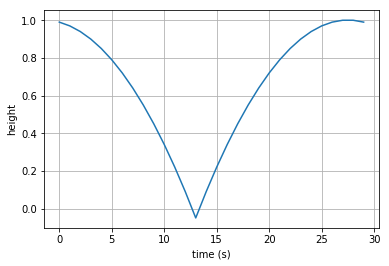

In [12]:
fig, ax = plt.subplots()
ax.plot(height_path)
ax.set(xlabel='time (s)', ylabel='height')
ax.grid()
plt.show()

In [56]:
a1 = 'relu'

input_layer = Input(shape=(2,))
hidden1 = Dense(10, activation=a1)(input_layer)
#hidden1 = keras.layers.Add()([input_layer, hidden1])
hidden2 = Dense(10, activation=a1)(hidden1)
#hidden2 = keras.layers.Add()([hidden1, hidden2])
output = Dense(1, activation=a1)(hidden2)

network = Model(input_layer, output)
network.compile(optimizer='adam', loss='binary_crossentropy')

In [51]:
network.fit(xdata, ydata, epochs = 200, batch_size =10, shuffle = True, verbose = 2)

Epoch 1/200
 - 1s - loss: 1.1053
Epoch 2/200
 - 0s - loss: 1.0289
Epoch 3/200
 - 0s - loss: 0.9658
Epoch 4/200
 - 0s - loss: 0.9078
Epoch 5/200
 - 0s - loss: 0.8589
Epoch 6/200
 - 0s - loss: 0.8197
Epoch 7/200
 - 0s - loss: 0.7808
Epoch 8/200
 - 0s - loss: 0.7467
Epoch 9/200
 - 0s - loss: 0.7178
Epoch 10/200
 - 0s - loss: 0.6911
Epoch 11/200
 - 0s - loss: 0.6676
Epoch 12/200
 - 0s - loss: 0.6455
Epoch 13/200
 - 0s - loss: 0.6266
Epoch 14/200
 - 0s - loss: 0.6083
Epoch 15/200
 - 0s - loss: 0.5919
Epoch 16/200
 - 0s - loss: 0.5762
Epoch 17/200
 - 0s - loss: 0.5640
Epoch 18/200
 - 0s - loss: 0.5509
Epoch 19/200
 - 0s - loss: 0.5401
Epoch 20/200
 - 0s - loss: 0.5294
Epoch 21/200
 - 0s - loss: 0.5207
Epoch 22/200
 - 0s - loss: 0.5123
Epoch 23/200
 - 0s - loss: 0.5038
Epoch 24/200
 - 0s - loss: 0.4966
Epoch 25/200
 - 0s - loss: 0.4912
Epoch 26/200
 - 0s - loss: 0.4854
Epoch 27/200
 - 0s - loss: 0.4806
Epoch 28/200
 - 0s - loss: 0.4761
Epoch 29/200
 - 0s - loss: 0.4730
Epoch 30/200
 - 0s - lo

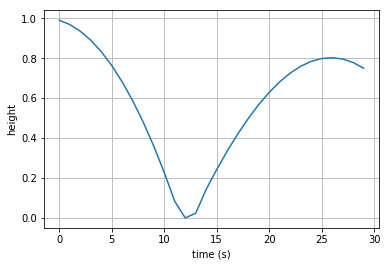

In [33]:
previous = 1.0
current = 0.99
height_tracker = []
for t in range(int(time/timestep)):
    # print(previous, current)
    height_tracker.append(current)
    prediction = network.predict(np.array([[previous, current],]))
    previous = current
    current = prediction[0][0]
    
fig, ax = plt.subplots()
ax.plot(height_tracker)
ax.set(xlabel='time (s)', ylabel='height')
ax.grid()
plt.show()

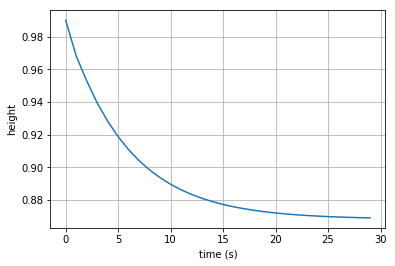

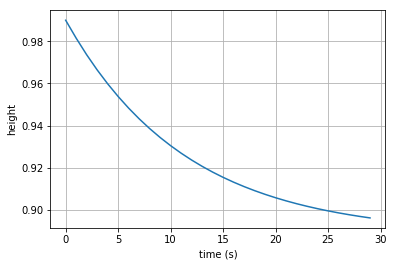

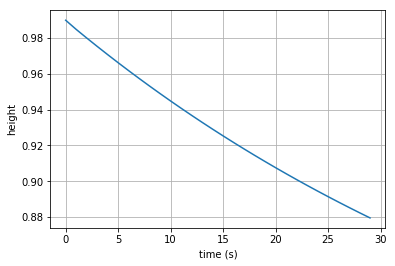

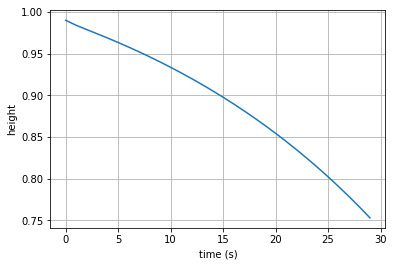

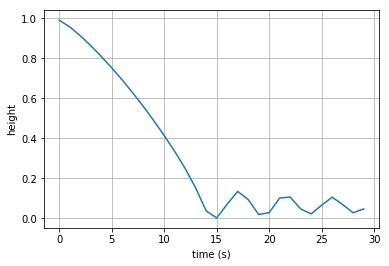

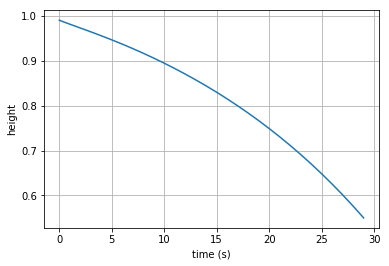

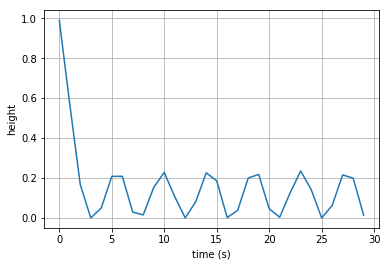

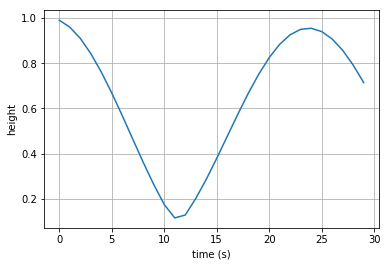

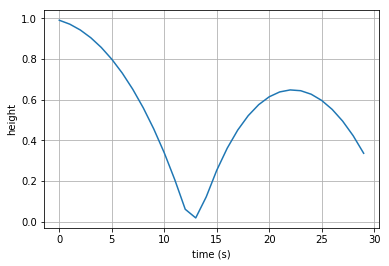

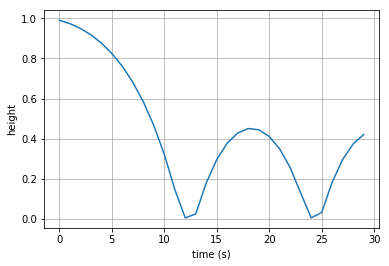

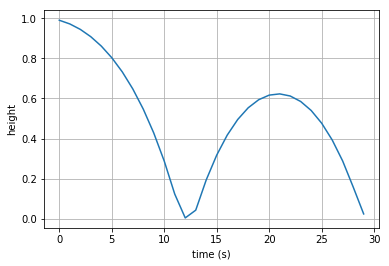

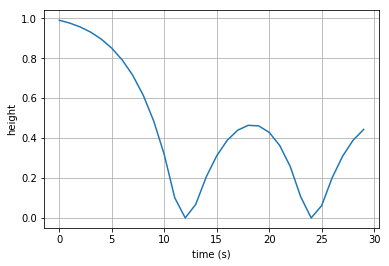

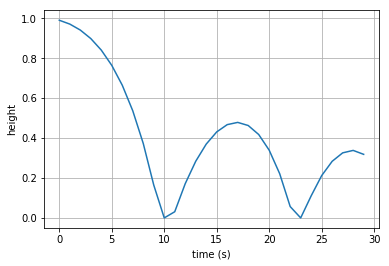

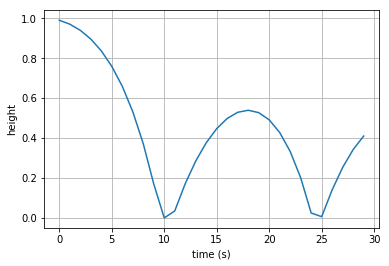

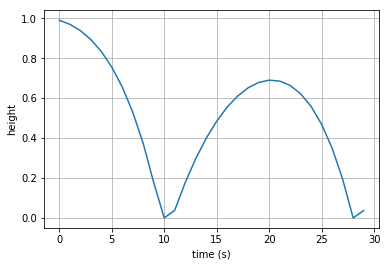

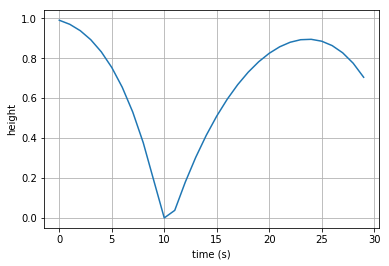

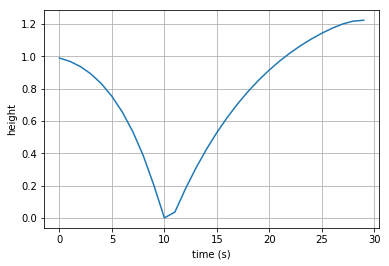

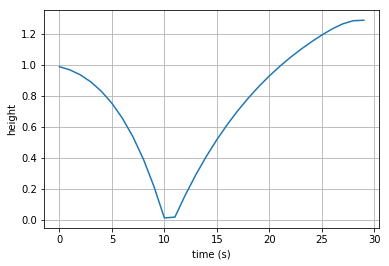

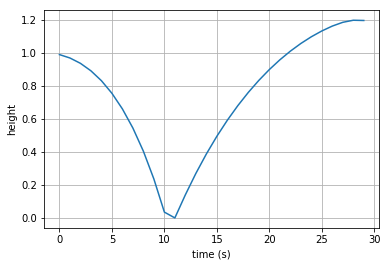

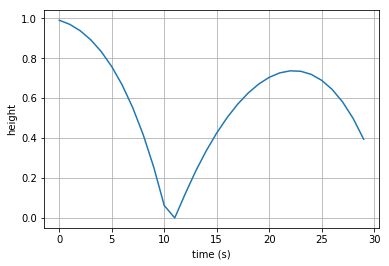

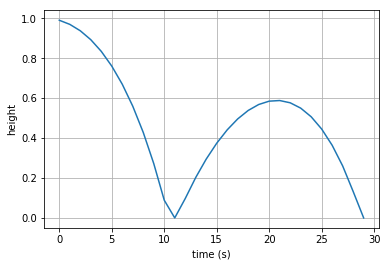

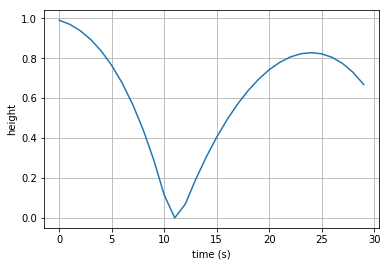

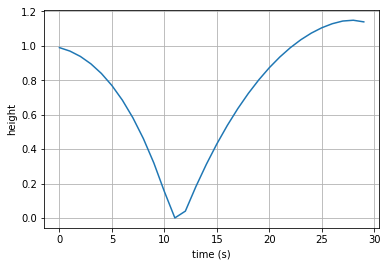

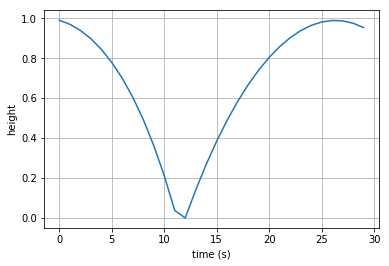

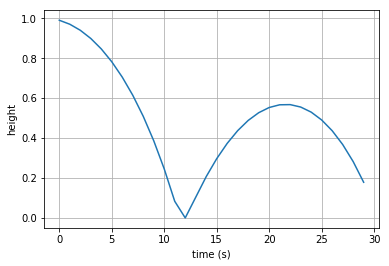

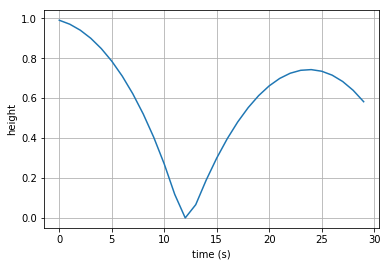

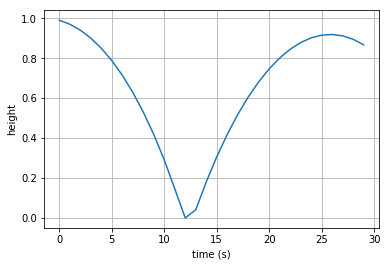

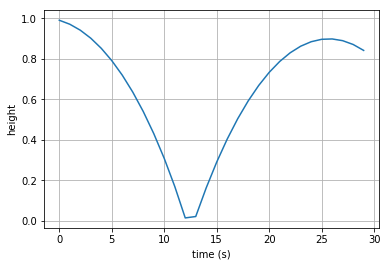

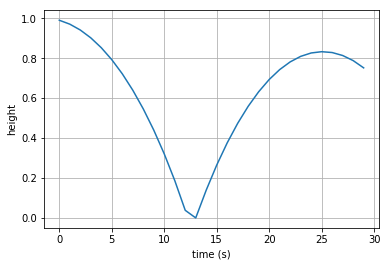

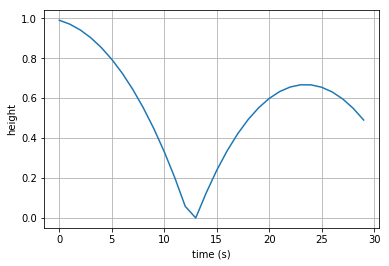

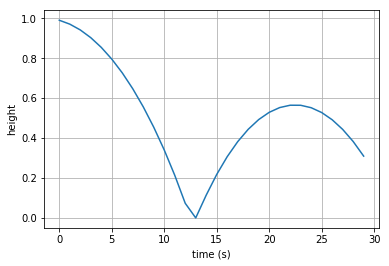

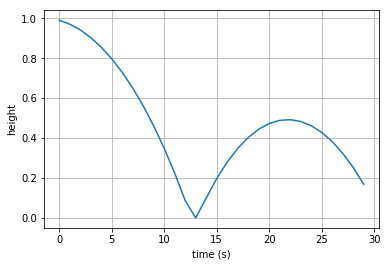

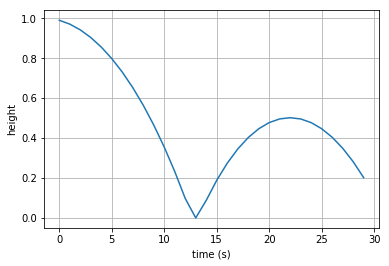

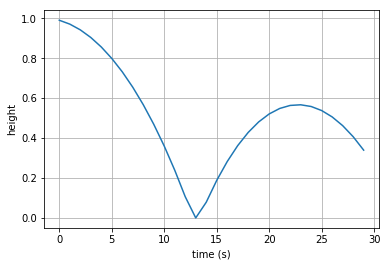

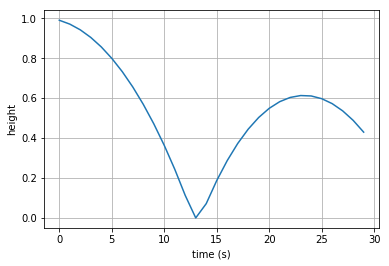

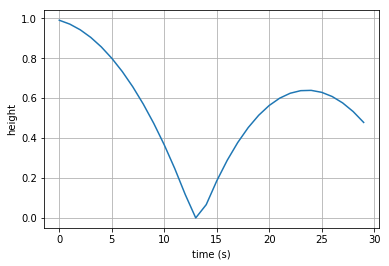

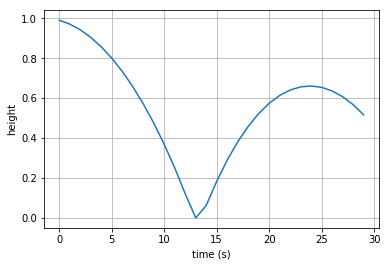

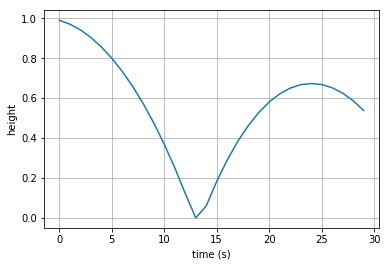

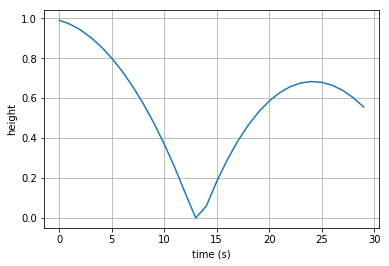

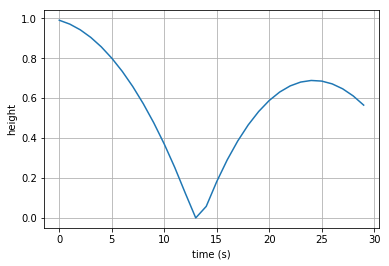

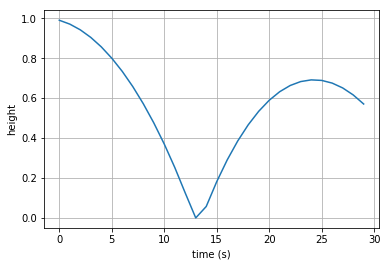

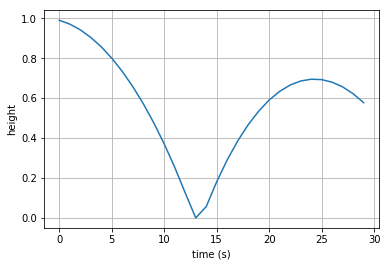

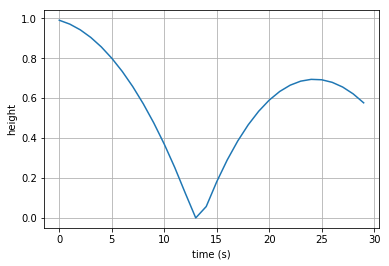

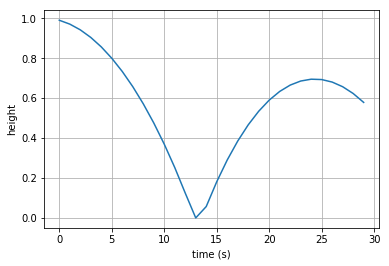

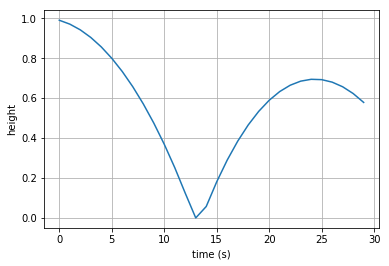

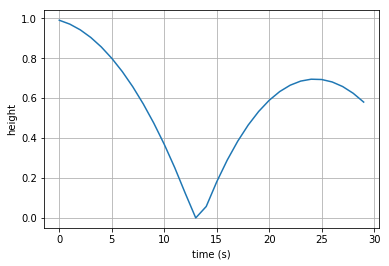

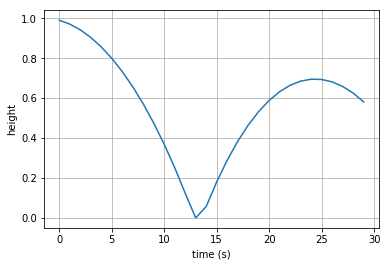

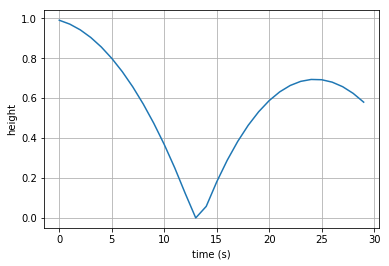

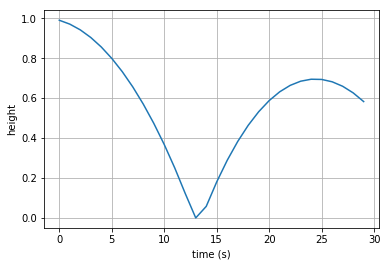

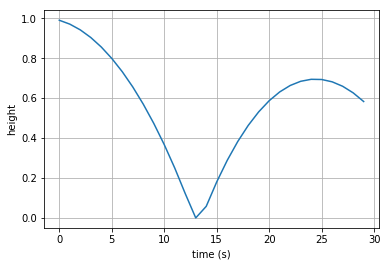

In [57]:
for loop in range(50):
    network.fit(xdata, ydata, epochs = 100, batch_size =100, shuffle = True, verbose = 0)
    previous = 1.0
    current = 0.99
    height_tracker = []
    for t in range(int(time/timestep)):
        # print(previous, current)
        height_tracker.append(current)
        prediction = network.predict(np.array([[previous, current],]))
        previous = current
        current = prediction[0][0]
        
    fig, ax = plt.subplots()
    ax.plot(height_tracker)
    ax.set(xlabel='time (s)', ylabel='height')
    ax.grid()
    plt.show()